# Assignment 3
_Due: Midnight on Tuesday October 8, 2019_

### NetID: sh2432

In this assignment you will gain some experience with decision trees and random forests using two data sets. One is a diabetes data set, where the task is to predict the progression of the disease. The other a data set of real estate listings, where the task is to forecast the sale price of the house.

#### Submission Instructions:

Please fill out this _starter_ Jupyter Notebook, and submit __both__ this `.ipynb` file as well as a pdf file (via html).

 - In the notebook interface, choose `File -> Download as -> Notebook (ipynb)`.
 - In the notebook interface, choose `File -> Download as -> HTML`. Then open the html file, and print to pdf.

Notes:

 - We are using the markdown cell-type for texts (and latex), and the code cell-type for the python code. Make sure you don't mix these up. You can change the type from the dropdown at the toolbar on the top.
 

In [9]:
import numpy as np
import matplotlib.pyplot as plt

## Question 1: Regression trees vs. random forests (20 pts)

This problem is based on the `diabetes` dataset from the `sklearn` package. Please read about the dataset at [https://scikit-learn.org/stable/datasets/index.html#diabetes-dataset](https://scikit-learn.org/stable/datasets/index.html#diabetes-dataset). We will seek to predict the response, which is a quantitative measure of diabetes progression one year after baseline, using regression trees and random forests.

The following cell imports the dataset as `diabetes` and names the predictor variables `diabetes_x` and the response `diabetes_y`. The names of the six predictor variables are also printed. For a more detailed description, use the `.DESCR` aspect of `diabetes`.

In [50]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
diabetes_x = diabetes.data
diabetes_y = diabetes.target
print(diabetes.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [51]:
diabetes.DESCR

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - Age\n      - Sex\n      - Body mass index\n      - Average blood pressure\n      - S1\n      - S2\n      - S3\n      - S4\n      - S5\n      - S6\n\nNote: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).\n\nSource URL:\nhttps://www4.stat.ncsu.edu/~boos/var.select/diabetes.h

### Part (a): Building a Simple Regression Tree

To start we will manually build a regression tree using only two of the predictor variables: `bmi` and `s5`. To keep things simple, build a tree that has exactly three nodes and four leaves. (i.e. the data is split into two parts initially and then each of those parts is again split one more time.) At each node you will need to evaluate each possible splitting point for both `bmi` and `s5` and pick the one that minimizes the RSS.

When you have built the regression tree, create a scatter plot of `s5` versus `bmi`, color-coded by the response variable. In this plot, use vertical and horizontal lines to indicate the regions that your tree splits the data into. You may find the functions `plt.hlines()` and `plt.vlines()` to be useful.

In [52]:
bmi = diabetes_x[:,2]
s5 = diabetes_x[:,8]
rss_bmi1 = []
rss_s51 = []

# we put a wrapper on the np.mean function to avoid warnings from taking the average of an empty list
def average(x):
    if len(x) == 0:
        return(0.0)
    else:
        return(np.mean(x))

# the following starter code finds the best splits for bmi and bp at the root
for i in range(len(bmi)):
    left1 = np.where(bmi <= bmi[i])[0]
    right1 = np.where(bmi > bmi[i])[0]
    rss_bmi1.append(np.sum((diabetes_y[left1] - average(diabetes_y[left1]))**2) + 
                   np.sum((diabetes_y[right1] - average(diabetes_y[right1]))**2))
    left1 = np.where(s5 <= s5[i])[0]
    right1 = np.where(s5 > s5[i])[0]
    rss_s51.append(np.sum((diabetes_y[left1] - average(diabetes_y[left1]))**2) + 
                  np.sum((diabetes_y[right1] - average(diabetes_y[right1]))**2))
#find the min RSS cut point for bmi and s5
best_bmi_cut1 = np.argmin(rss_bmi1)
best_s5_cut1 = np.argmin(rss_s51)

In [53]:
best_bmi_cut1

271

In [54]:
best_s5_cut1

252

In [55]:
#model 1
rss_s52_left= []
rss_s52_right= []
#bmi as node1, separate bmi
left2 = np.where(bmi <= bmi[best_bmi_cut1])[0]
right2 = np.where(bmi > bmi[best_bmi_cut1])[0]
#s5 as node 2, find the min RSS and the cut point for the left side
for j in range(len(left2)):
    left3 = np.where(s5[left2] <= s5[left2][j])[0]
    right3 = np.where(s5[left2]  > s5[left2][j])[0]
    rss_s52_left.append(np.sum((diabetes_y[left3] - average(diabetes_y[left3]))**2) + 
                  np.sum((diabetes_y[right3] - average(diabetes_y[right3]))**2))

#s5 as node 2, find the min RSS and the cut point for the right side
for j in range(len(right2)):
    left3 = np.where(s5[right2] <= s5[right2][j])[0]
    right3 = np.where(s5[right2]  > s5[right2][j])[0]
    rss_s52_right.append(np.sum((diabetes_y[left3] - average(diabetes_y[left3]))**2) + 
                  np.sum((diabetes_y[right3] - average(diabetes_y[right3]))**2))

best_s5_cut2_left = np.argmin(rss_s52_left)
best_s5_cut2_right = np.argmin(rss_s52_right)

#calculate total RSS for the model
RSS1=min(rss_s52_left)+min(rss_s52_right)

In [56]:
best_s5_cut2_left

62

In [57]:
best_s5_cut2_right

81

In [58]:
RSS1

2565517.3304857835

In [59]:
#model 2
rss_bmi2_left = []
rss_bmi2_right = []
#s5 as node1, separate s5
left4 = np.where(s5 <= s5[best_s5_cut1])[0]
right4 = np.where(s5 > s5[best_s5_cut1])[0]
#bmi as node 2, find the min RSS and the cut point for the left
for m in range(len(left4)):
    left5 = np.where(bmi[left4] <= bmi[left4][m])[0]
    right5 = np.where(bmi[left4]  > bmi[left4][m])[0]
    rss_bmi2_left.append(np.sum((diabetes_y[left5] - average(diabetes_y[left5]))**2) + 
                  np.sum((diabetes_y[right5] - average(diabetes_y[right5]))**2))
#bmi as node 2, find the min RSS and the cut point for the right
for m in range(len(right4)):
    left5 = np.where(bmi[right4] <= bmi[right4][m])[0]
    right5 = np.where(bmi[right4]  > bmi[right4][m])[0]
    rss_bmi2_right.append(np.sum((diabetes_y[left5] - average(diabetes_y[left5]))**2) + 
                  np.sum((diabetes_y[right5] - average(diabetes_y[right5]))**2))

best_bmi5_cut2_left = np.argmin(rss_bmi2_left)
best_bmi5_cut2_right = np.argmin(rss_bmi2_right)

#calculate total RSS for the model
RSS2=min(rss_bmi2_left)+min(rss_bmi2_right)

#model 2 has a smaller total RSS, therefore, we should use s5 as node 1, bmi as node2

In [60]:
bmi[left4][best_bmi5_cut2_left]

-0.084886235529114

In [61]:
best_bmi5_cut2_left

176

In [62]:
bmi[right4][best_bmi5_cut2_right]

-0.0223731352440218

In [63]:
best_bmi5_cut2_right

141

In [64]:
RSS2

2454029.6263736263

In [65]:
s5[best_s5_cut1]

-0.00421985970694603

In [66]:
#generate 4 leaves
leaf1=(s5 <= s5[best_s5_cut1]) & (bmi <= bmi[left4][best_bmi5_cut2_left])
leaf2=(s5 <= s5[best_s5_cut1]) & (bmi > bmi[left4][best_bmi5_cut2_left])
leaf3=(s5 > s5[best_s5_cut1]) & (bmi <= bmi[right4][best_bmi5_cut2_right])
leaf4=(s5 > s5[best_s5_cut1]) & (bmi > bmi[right4][best_bmi5_cut2_right])

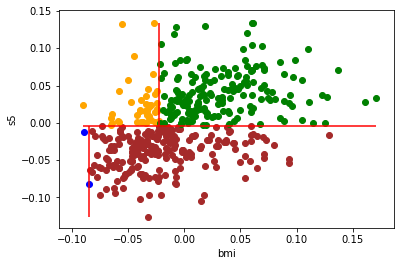

In [67]:
#scatter plot of bmi & s5
plt.scatter(bmi[leaf1], s5[leaf1],color='blue')
plt.scatter(bmi[leaf2], s5[leaf2],color='brown')
plt.scatter(bmi[leaf3], s5[leaf3],color='orange')
plt.scatter(bmi[leaf4], s5[leaf4],color='green')
plt.hlines(s5[best_s5_cut1],min(bmi),max(bmi),colors='r' )
plt.vlines(bmi[left4][best_bmi5_cut2_left], min(s5), s5[best_s5_cut1], colors='r')
plt.vlines(bmi[right4][best_bmi5_cut2_right], s5[best_s5_cut1], max(s5),colors='r')
plt.xlabel('bmi')
plt.ylabel('s5');

### Part (b) Fitting a Full Regression Tree

Now build a tree that uses all the predictor variables, has a more flexible structure, and is validated with a test set. Split the full dataset into a training set and a test set (50/50). Fit a regression tree to the training set using the function `DecisionTreeRegressor` from `sklearn.tree`. For now, use your best judgment to choose parameters for tree complexity; we will use analytical methods to choose parameters in later parts of this problem set. Some starter code is provided:

In [193]:
from sklearn import tree
#split data into 50/50
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(diabetes_x, diabetes_y, test_size=0.50, random_state=42)

regr = tree.DecisionTreeRegressor(max_depth=3).fit(xtrain, ytrain) 
#tree parameters go inside the first set of parenthases and the training data goes in the second set of parenthases
    

### Part (c) Plotting the Tree

Plot your regression tree. To do so, we suggest that you use GraphViz in conjunction with `sklearn.tree.export_graphviz`. Once you install GraphViz, the following cell will plot the tree.

Instructions for using GraphViz (Windows):

1. Install GraphViz to your computer from the link [https://graphviz.gitlab.io/download/](https://graphviz.gitlab.io/download/).

2. Install the Python package using `pip install graphviz` or `conda install graphviz`.

3. Set a path to your computer's GraphViz installation (NOT the Python package). You can do so locally in this notebook by running something like `import os; os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'` (substituting in the location of your own GraphViz installation).

4. You can now use the functions in the `graphviz` package with `sklearn.tree.export_graphviz`!

Instructions for using GraphViz (Mac OS):

1. Make sure you have the package manager Homebrew.

2. Install GraphViz to your computer using `brew install graphviz`.

3. Install the Python package using `pip install graphviz` or `conda install graphviz`.

4. You can now use the functions in the `graphviz` package with `sklearn.tree.export_graphviz`! _Note: If you get an ExecutableNotFound error, you might have to set a path to your computer's GraphViz installation (NOT the Python package). You can do so locally in this notebook by running something like `import os; os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'` (substituting in the location of your own GraphViz installation)._


In [69]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [21]:
import graphviz
import os; os.environ["PATH"] += os.pathsep + 'C:/Users/kavan/Anaconda3/Lib/site-packages/graphviz/'
graphviz.Source(tree.export_graphviz(regr, out_file=None, feature_names=diabetes.feature_names))
#having trouble using graphviz.

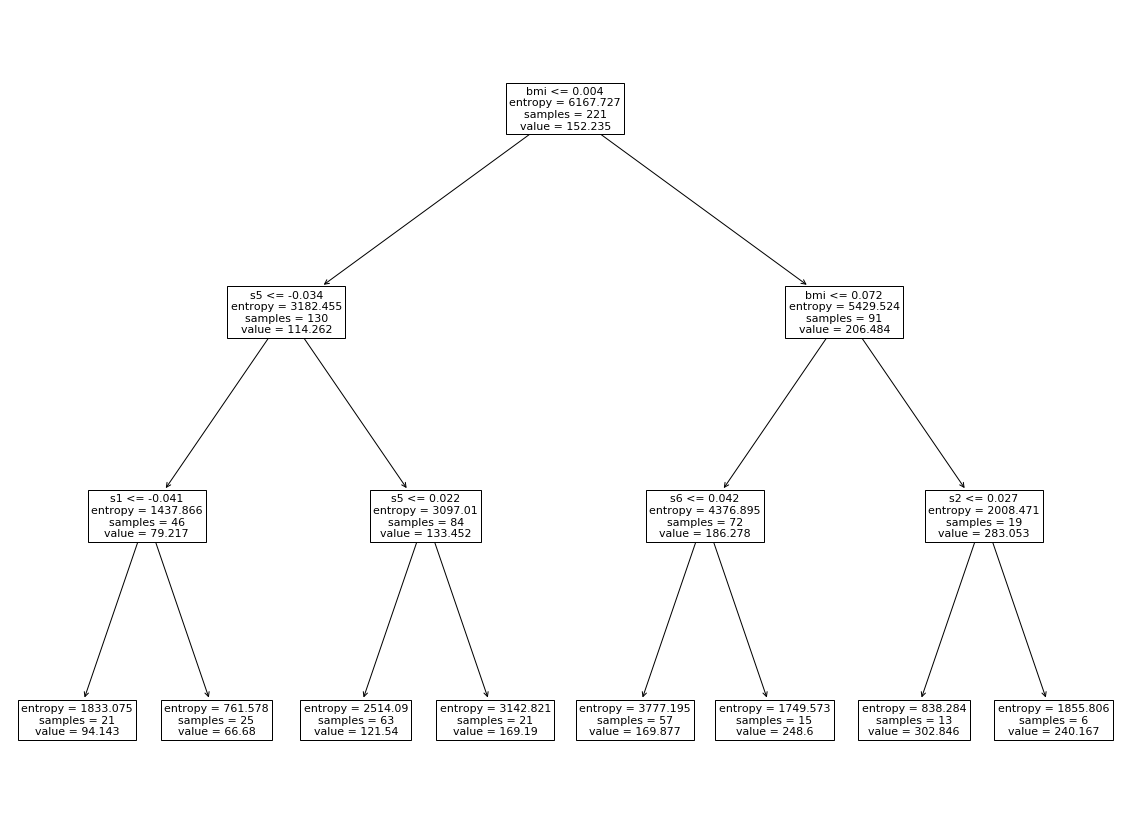

In [194]:
from sklearn import tree
plt.figure(figsize=(20,15))
_=tree.plot_tree(regr, feature_names = diabetes.feature_names, fontsize=11)

In [188]:
regr.feature_importances_

array([0.        , 0.        , 0.72905174, 0.        , 0.01052853,
       0.01972725, 0.        , 0.        , 0.1506786 , 0.09001388])

### Part (d) Evaluation

Interpret your regression tree. What are some examples of variables that seem to correspond with higher or lower measures of diabetes progression? Find the MSE of the model using the test set. The `.predict` method for your model can help with this.

In [90]:
y_predicted = regr.predict(xtest)
from sklearn.metrics import mean_squared_error
print("Mean squared error: %.2f"% mean_squared_error(ytest, y_predicted))
#mse=np.sum((ytest-y_predicted)**2)/len(ytest)

Mean squared error: 3999.39


BMI, s5, s2, s6 and s1 are associated with diabetes progression. From the regression tree, we can interpret that one has BMI>0.072 and s2<=0.027 are at the highest risk of diabetes progression. On the other hand, people with BMI<=0.004, s5<=-0.034, and s1>-0.041 are at the lowest risk of diabetes progression.

### Part (e) Random Forest

Now use random forests to analyze the data with the `RandomForestRegressor` function from `sklearn.ensemble`. (Again, you may use your best judgment to choose the initial parameters for tree complexity.)

__(i)__ What test MSE do you obtain, and how does it compare to the test MSE of the regression tree above? 

__(ii)__ According to the model, which variables are most important in predicting diabetes progression? (The `.feature_importances_` method of the model may help with this.)

__(iii)__ Plot the MSE of the prediction against $m$, the number of variables considered at each split.

__(iv)__ Comment on the plot you created and if it makes sense.

In [230]:
from sklearn import ensemble
import warnings
warnings.filterwarnings("ignore")
# Here is an example of how to use the random forest function in sklearn.ensemble.
# The code below assumes that the training inputs and responses are loaded in the variables train_x and train_y
# and that the test predictor variables are in test_x
np.random.seed(1000)
dtr = ensemble.RandomForestRegressor(min_samples_leaf = 15, max_features = 10)
regr = dtr.fit(xtrain, ytrain)
pred_y = regr.predict(xtest)
mse = sum(np.square(ytest-pred_y))/len(ytest)
print("Mean squared error: %.2f"% mean_squared_error(ytest, pred_y))
mse

Mean squared error: 3295.84


3295.836341361681

i. the MSE of the model is 3295.84. It is smaller than the above regression tree model.

In [231]:
dtr.feature_importances_

array([0.01617747, 0.00740353, 0.55058908, 0.08585296, 0.01930502,
       0.        , 0.02745899, 0.00140377, 0.20423688, 0.08757232])

ii. bmi is the most important variable to predict diabetes progression.

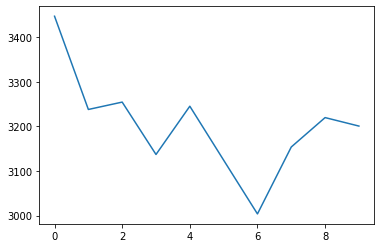

In [233]:
import warnings
warnings.filterwarnings("ignore")
list_mse=[]
np.random.seed(1000)
for m in range(1,11):    
    dtr = ensemble.RandomForestRegressor(min_samples_leaf = 15, max_features = m)
    regr = dtr.fit(xtrain, ytrain)
    pred_y = regr.predict(xtest)
    mse = sum(np.square(ytest-pred_y))/len(ytest)
    list_mse.append(mse)
plt.plot(list_mse);

iv. from the graph we can see that the mininum MSE is achieved when m=6.   

## Question 2: Analyzing Real Estate Data (40 pts)

In this problem, you will train random forests on data from the website Zillow to forecast the sale price of real estate listings. Random forests are nonparametric methods for classification and regression. As discussed in class, the method is based on the following idea: a good predictor will have low bias and low variance. A deep decision tree has low bias, but high variance. To reduce the variance, multiple trees are fit and averaged together. By introducing randomness in the construction of the trees, the correlation between them is reduced, to facilitate the variance reduction.

Read in the training and test sets as follows:

`import pandas as pd
train = pd.read_csv("zillow_train.csv")
test = pd.read_csv("zillow_test.csv")`

Use the following variables: `Lat`, `Long`, `ListPrice`, `SaleYear`, `Bathroom`, `Bedroom`, `BuildDecade`, `MajorRenov`, `FinishSqFt`, `LotSqFt`, `MSA`, `City`, `HighSchool`, `SalePrice`. You will build regression models to predict `SalePrice`.


### (a) Explore the data

Get an idea of what kind of data you're working with. As usual, you might ask yourself what $n$ (sample size) and $p$ (number of predictor variables) are here. Make plots of the distributions of the variables. Include a plot of the response, `SalePrice`. Does it appear that the data are "raw", or have they been pre-processed in different ways? If so, how?

In [106]:
import pandas as pd
train = pd.read_csv("zillow_training.csv")
test = pd.read_csv("zillow_testing.csv")

In [277]:
train.head()

,ID,Lat,Long,ListDate,ListPrice,SaleDate,TimetoSale,SaleYear,ForSale,SalePrice,...,Bathroom,Bedroom,BuiltYear,BuildDecade,MajorRenov,FinishSqFt,LotSqFt,MSA,City,HighSchool
0,39946197,41.046541,-74.753302,3/12/14 17:06,170000.0,5/16/14,64.287500,2014,0,165000.0,...,1.0,3,1965.0,1960,NONE,1198.0,6969.0,New York City,Newton,Newton High School
1,29024678,32.767862,-97.079833,2/28/13 9:40,120000.0,4/4/13,34.597222,2013,0,114000.0,...,2.0,3,1980.0,1980,NONE,1547.0,10410.0,Dallas,Arlington,Lamar High School
2,3516596,42.055590,-87.716377,4/9/13 13:30,599000.0,9/12/13,155.437500,2013,0,585000.0,...,2.5,4,1967.0,1960,NONE,2800.0,7452.0,Chicago,Evanston,Evanston Twp High School
3,65546456,41.978603,-87.658271,1/16/13 4:02,400000.0,4/17/13,90.831944,2013,0,404000.0,...,3.0,3,2002.0,2000,NONE,2400.0,7627.0,Chicago,Chicago,Senn High School
4,25108921,33.937434,-117.945730,6/3/14 22:33,425000.0,7/15/14,41.060417,2014,0,435000.0,...,2.0,3,1951.0,1950,NONE,1442.0,5662.0,Los Angeles,La Habra,NONE


In [97]:
train.shape

(77728, 24)

In [103]:
test.head()

,ID,Lat,Long,ListDate,ListPrice,SaleDate,TimetoSale,SaleYear,ForSale,SalePrice,...,Bathroom,Bedroom,BuiltYear,BuildDecade,MajorRenov,FinishSqFt,LotSqFt,MSA,City,HighSchool
0,29316121,32.596935,-97.142223,4/25/14 17:09,225000.0,5/14/14,18.285417,2014,0,225500.0,...,3.0,4,2001.0,2000,NONE,2826.0,9639.0000,Dallas,Mansfield,Mansfield High School
1,38014766,40.984025,-74.079963,7/7/13 18:05,599000.0,10/17/13,101.246528,2013,0,630000.0,...,2.5,4,1964.0,1960,NONE,1982.0,14098.0000,New York City,Ridgewood,NONE
2,29253378,32.683928,-97.168452,4/11/13 1:20,205000.0,6/6/13,55.944444,2013,0,207500.0,...,2.5,4,1988.0,1980,NONE,2478.0,10454.0000,Dallas,Arlington,Martin High School
3,31099617,40.751243,-73.683799,6/25/13 13:09,475000.0,7/3/13,7.452083,2013,0,470000.0,...,1.0,4,1941.0,1940,NONE,1288.0,6011.0000,New York City,North New Hyde Park,NONE
4,21253918,33.832280,-118.246070,11/14/13 12:05,279000.0,1/16/14,62.496528,2014,0,279000.0,...,2.0,3,1985.0,1980,NONE,1185.0,12791.8728,Los Angeles,Carson,Phineas Banning Senior High School


In [100]:
test.shape

(18682, 24)

In [99]:
#variable names in the train dataset
for col in train.columns: 
    print(col) 

ID
Lat
Long
ListDate
ListPrice
SaleDate
TimetoSale
SaleYear
ForSale
SalePrice
Zest
SaleList
ZestList
ZestSale
Bathroom
Bedroom
BuiltYear
BuildDecade
MajorRenov
FinishSqFt
LotSqFt
MSA
City
HighSchool


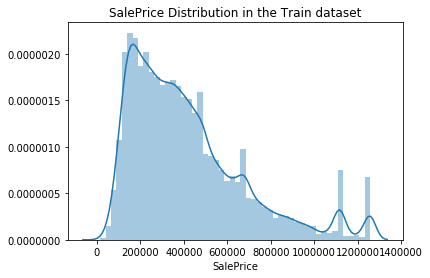

In [234]:
import seaborn as sns
plt.title("SalePrice Distribution in the Train dataset")
sns.distplot(train['SalePrice']);

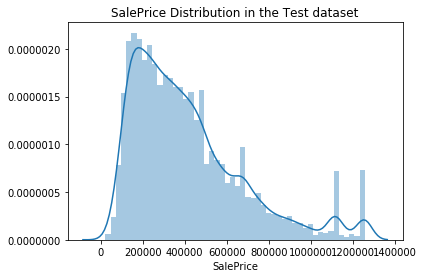

In [235]:
plt.title("SalePrice Distribution in the Test dataset")
sns.distplot(test['SalePrice']);

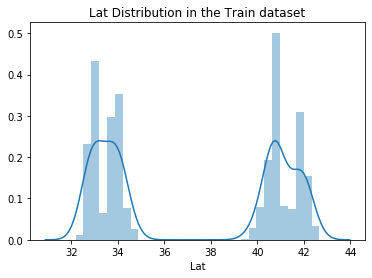

In [236]:
plt.title("Lat Distribution in the Train dataset")
sns.distplot(train['Lat']);

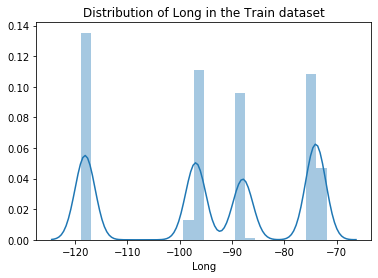

In [260]:
plt.title("Distribution of Long in the Train dataset")
sns.distplot(train['Long']);

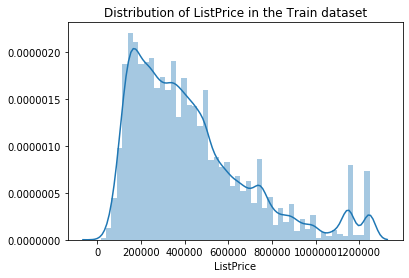

In [238]:
plt.title("Distribution of ListPrice in the Train dataset")
sns.distplot(train['ListPrice']);

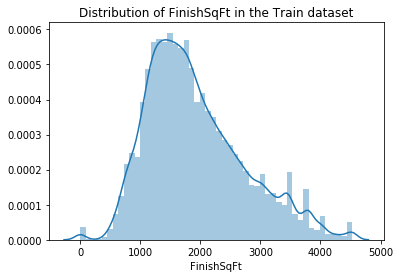

In [239]:
plt.title("Distribution of FinishSqFt in the Train dataset")
sns.distplot(train['FinishSqFt']);

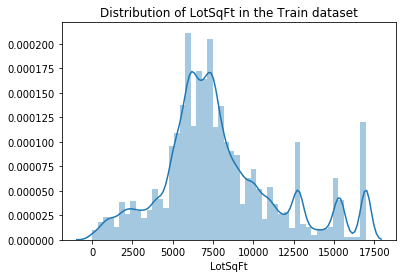

In [240]:
plt.title("Distribution of LotSqFt in the Train dataset")
sns.distplot(train['LotSqFt']);

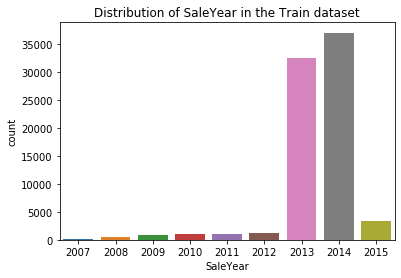

In [247]:
plt.title("Distribution of SaleYear in the Train dataset")
sns.countplot(train['SaleYear']);

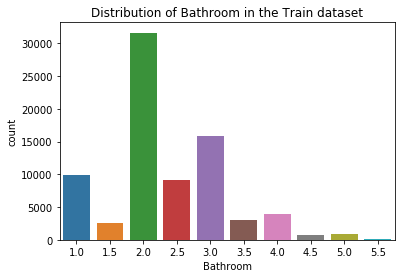

In [248]:
plt.title("Distribution of Bathroom in the Train dataset")
sns.countplot(train['Bathroom']);

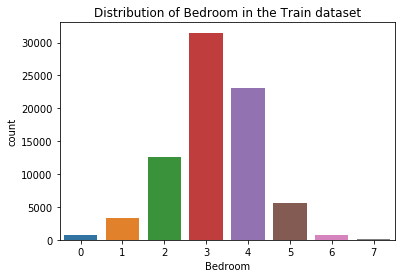

In [249]:
plt.title("Distribution of Bedroom in the Train dataset")
sns.countplot(train['Bedroom']);

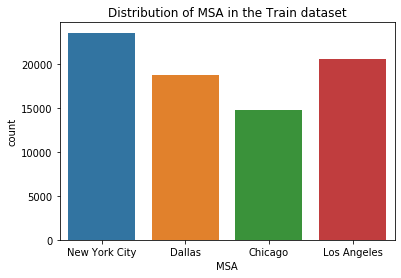

In [243]:
plt.title("Distribution of MSA in the Train dataset")
sns.countplot(train['MSA']);

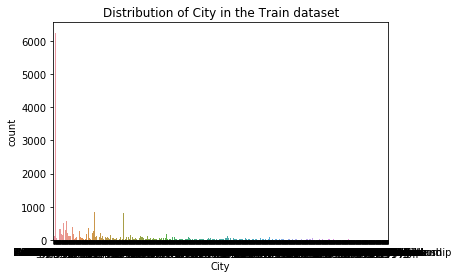

In [244]:
plt.title("Distribution of City in the Train dataset")
sns.countplot(train['City']);

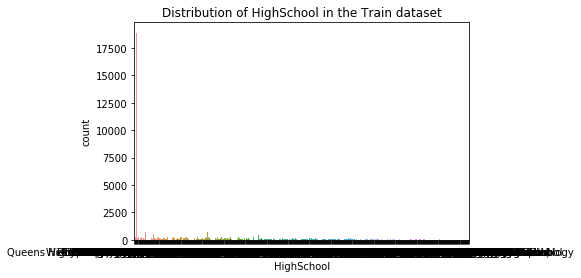

In [245]:
plt.title("Distribution of HighSchool in the Train dataset")
sns.countplot(train['HighSchool']);

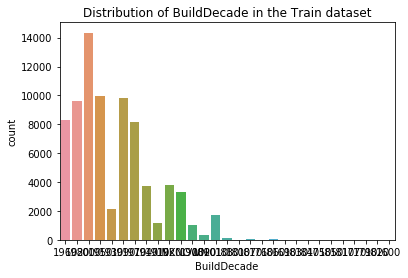

In [252]:
plt.title("Distribution of BuildDecade in the Train dataset")
sns.countplot(train['BuildDecade']);

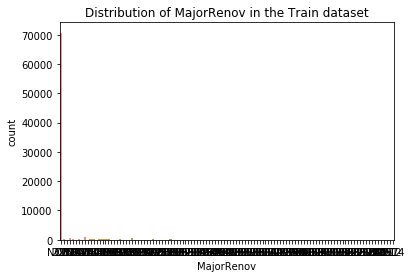

In [253]:
plt.title("Distribution of MajorRenov in the Train dataset")
sns.countplot(train['MajorRenov']);

There are n1=77728 rows of data in the train dataset, while n2=18682 rows of data in the test dataset. There are 24 variables in both datasets. As mentioned in the question discription, we want to use p=13 predictor variables (Lat, Long, ListPrice, SaleYear, Bathroom, Bedroom, BuildDecade, MajorRenov, FinishSqFt, LotSqFt, MSA, City, HighSchool) to predict SalePrice. The distribution of SalePrice in both test and train datasets are right skewed.

### Part (b) Preliminary steps

__(i)__ Some of the variables in the data are categorical; how many values do they take? (You may find the `.nunique` method of pandas to be useful here.) Why might factor variables with many categories present a problem when fitting decision trees? Describe a couple different ways of handling factor variables when fitting decision trees.


In [149]:
#data types of train datase
train.dtypes

ID               int64
Lat            float64
Long           float64
ListDate        object
ListPrice      float64
SaleDate        object
TimetoSale     float64
SaleYear         int64
ForSale          int64
SalePrice      float64
Zest           float64
SaleList       float64
ZestList       float64
ZestSale       float64
Bathroom       float64
Bedroom          int64
BuiltYear      float64
BuildDecade     object
MajorRenov      object
FinishSqFt     float64
LotSqFt        float64
MSA             object
City            object
HighSchool      object
dtype: object

In [160]:
#number of values in each variable
train.nunique()

ID             77684
Lat            72960
Long           73090
ListDate       43347
ListPrice       4774
SaleDate        1955
TimetoSale     50277
SaleYear           9
ForSale            2
SalePrice       5052
Zest           69332
SaleList       21691
ZestList       73025
ZestSale       72525
Bathroom          10
Bedroom            8
BuiltYear        182
BuildDecade       29
MajorRenov       113
FinishSqFt      6222
LotSqFt        10374
MSA                4
City            1289
HighSchool       654
dtype: int64

In [142]:
#data types of test dataset
test.dtypes

ID               int64
Lat            float64
Long           float64
ListDate        object
ListPrice      float64
SaleDate        object
TimetoSale     float64
SaleYear         int64
ForSale          int64
SalePrice      float64
Zest           float64
SaleList       float64
ZestList       float64
ZestSale       float64
Bathroom       float64
Bedroom          int64
BuiltYear      float64
BuildDecade     object
MajorRenov      object
FinishSqFt     float64
LotSqFt        float64
MSA             object
City            object
HighSchool      object
dtype: object

In [121]:
#number of values in each variable
test.nunique()

ID             18680
Lat            18224
Long           18226
ListDate       14180
ListPrice       2339
SaleDate        1361
TimetoSale     15416
SaleYear           9
ForSale            2
SalePrice       2522
Zest           17433
SaleList        8298
ZestList       17679
ZestSale       17649
Bathroom          10
Bedroom            8
BuiltYear        155
BuildDecade       24
MajorRenov        98
FinishSqFt      4147
LotSqFt         4501
MSA                4
City            1092
HighSchool       625
dtype: int64

Among the 13 predictors, BuildDecade, MajorRenov, MSA, City, and HighSchool are categorical variables. These variables with many levels can lead to overfitting of the training data. Possible ways of handling categorical variables are: 
1. Treating factor variables with numeric values as continuous variables 
2. Regrouping levels of factor variables into fewer levels. 
3. Ignoring factor variables with many levels. 
4. Ordering the factor variables. 

__(ii)__ Use your best judgement to modify the Zillow dataset to handle factor variables. In addition to `pandas` and `numpy`, it might be helpful to look at functions in `sklearn.preprocessing`.

In [107]:
#would like to convert factors into binary
##find the element with the greatest values
train['City'].value_counts()
#new york shows the most count number
train['HighSchool'].value_counts()
#None values in Highschool

#convert city to binary
train['City1'] = np.where(train['City'].str.contains('New York'), 1, 0)
test['City1'] = np.where(test['City'].str.contains('New York'), 1, 0)
#convert Highschool to binary
train['HighSchool1'] = np.where(train['HighSchool'].str.contains('NONE'), 0, 1)
test['HighSchool1'] = np.where(test['HighSchool'].str.contains('NONE'), 0, 1)

In [108]:
#handle other factor variables
from sklearn.preprocessing import LabelEncoder
num=LabelEncoder()
#train data
train['MSA']=num.fit_transform(train['MSA'].astype('str')) #convert categorical variable to numeric
train['BuildDecade']=train['BuildDecade'].replace('UNKNOWN', 0).astype(int) #replace missing values
train['MajorRenov']=train['MajorRenov'].replace('NONE', 0).astype(int) #replace missing values
#test data
test['MSA']=num.fit_transform(test['MSA'].astype('str')) #convert categorical variable to numeric
test['BuildDecade']=test['BuildDecade'].replace('UNKNOWN', 0).astype(int) #replace missing values
test['MajorRenov']=test['MajorRenov'].replace('NONE', 0).astype(int) #replace missing values

In [36]:
# function to get unique values of a variable
def unique(list1): 
    x = np.array(list1) 
    print(np.unique(x)) 
    
list1=train['MajorRenov']
unique(list1) 

[   0 1899 1901 1903 1905 1906 1908 1910 1911 1912 1913 1914 1915 1916
 1917 1918 1919 1920 1921 1922 1923 1924 1925 1926 1927 1928 1929 1930
 1931 1932 1933 1934 1935 1936 1937 1938 1939 1940 1941 1942 1943 1944
 1945 1946 1947 1948 1949 1950 1951 1952 1953 1954 1955 1956 1957 1958
 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972
 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986
 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000
 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015]


In [109]:
#get train and test datasets
##decide not to use BuildDecade, MajorRenov, Long, and Lat. City and Highschool are converted to binary
train_y=train["SalePrice"]
test_y=test["SalePrice"]
train_x=train[['ListPrice', 'SaleYear', 'Bathroom', 'Bedroom', 'FinishSqFt', 'LotSqFt', 'MSA', 'City1', 'HighSchool1']]
test_x=test[['ListPrice', 'SaleYear', 'Bathroom', 'Bedroom', 'FinishSqFt', 'LotSqFt', 'MSA', 'City1', 'HighSchool1']]

__(iii)__ We will soon use a few methods to predict `SalePrice`. Throughout, we will evaluate the predictions in terms of the absolute relative error:

<center>$\frac{1}{n}\sum_{i=1}^n \frac{\mid Y_i - \hat{Y}_i\mid}{Y_i}$</center>

Explain why this is a more appropriate choice of accuracy, compared with squared error.

The absolute relative error takes the scale of response variable into account while MSE does not. It gives a percentage deviation of the predicted value from the true value, which is more understandable and reasonable.

### Part (c) Build models using random forests

Build random forest models to predict `SalePrice` from the other variables, using the appropriate method from `sklearn.ensemble`. As in Question 1, one parameter to vary is `max_features`, or the number of variables allowed in each split; this regulates the correlation between the trees in the random forest by introducing randomness. Two more relevant parameters are `n_estimators` and `min_samples_leaf`, or number of trees and minimum node size, which regulate variance and bias.

Train several random forest models, each time using different values of the parameters. Evaluate each model using 5-fold cross-validation (`sklearn.model_selection.KFold` may be a useful resource to perform k-fold cross-validation). For the sake of time, you may keep `n_estimators` low and constant. First vary `max_features` and create a plot of the cross-validation error versus the value of this parameter. Next vary `min_samples_leaf` and create a similar plot with the values of this parameter. 

Comment on how cross-validation error relates to `max_features` and `min_samples_leaf`, and how do you imagine it would relate to `n_estimators`? Does this make sense to you?

Now find a combination of values for `max_features` and `min_samples_leaf` that approximately minimizes the cross-validation error. 

_Note: Use mean absolute error (`mae`) rather than mean squared error (`mse`) as the criterion for growing the trees. But then when you evaluate different models, compute the relative absolute error, as described above._

In [ ]:
#Starter Code to fill in and complete
from sklearn import model_selection
from sklearn import ensemble
kf = model_selection.KFold(n_splits=5)
x=train_x
y=pd.DataFrame(train_y)

mae_list=[]
for m in range(20, 30): # vary min_samples_leaf

    dtr = ensemble.RandomForestRegressor(n_estimators = 9, min_samples_leaf = m, #these are the parameters to vary
                                         max_features = 9, criterion = 'mae')
    l=[]
    for train_index, test_index in kf.split(x):
        trainx = x.iloc[train_index,:]
        trainy = y.iloc[train_index,:]
        regr= dtr.fit(trainx, trainy.values.ravel())
        
        testx = x.iloc[test_index,:]
        testy = y.iloc[test_index,:]
        
        predy=regr.predict(testx)
        testy=testy.astype(float)
        
        predy=pd.DataFrame(predy)
        predy.index=testy.index
        predy.columns=['SalePrice']
        
        mae=(np.sum(abs(predy-testy)/testy))/len(predy)
        mae=float(mae)
        l.append(mae)
    mae_mean=np.mean(l)
    mae_list.append(mae_mean)

### Part (d) Comparison to Least-Squares Regression

Now build a least-squares linear model for the response variable as a function of the predictor variables using the training set. You may wish to use the `sklearn.linear_model.LinearRegression` function, described
[here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

Experiment with different subsets of the predictor variables included in the linear model. 

Using the random forest model from Part (c) with the best combination of values for `max_features` and `min_samples_leaf` that you found, compare both the mean squared error and the relative absolute error on the test set from the random forest and linear models.

Which model does a better job at prediction? Do you think the model with the higher MSE has higher variance or higher bias, or both?

In [142]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
r1 = smf.ols('SalePrice ~ Lat+Long+ListPrice+SaleYear+Bathroom+Bedroom+FinishSqFt+LotSqFt+BuildDecade+MajorRenov+MSA+City1+HighSchool1', data=train).fit()
r1.summary()
#p value of builddecade and highschool are >0.05, remove these predictors

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 2.036e+06
Date:                Mon, 07 Oct 2019   Prob (F-statistic):               0.00
Time:                        23:49:27   Log-Likelihood:            -8.5420e+05
No. Observations:               77728   AIC:                         1.708e+06
Df Residuals:                   77714   BIC:                         1.709e+06
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.344e+06   9.96e+04    -13.492      0.000   -1.54e+06   -1.15e+06
Lat          -666.0693     25.398    -26.225      0.000    -715.849    -616.289
Long         -217.9638      6.617    -32.940      0.000    -230.933    -204.994
ListPrice       0.9820      0.000   3416.277      0.000       0.981       0.983
SaleYear      670.6611     49.471     13.557      0.000     573.699     767.624
Bathroom     -317.6399    100.012     -3.176      0.001    -513.663    -121.616
Bedroom      -375.7231     71.974     -5.220      0.000    -516.792    -234.655
FinishSqFt     -1.6260      0.130    -12.553      0.000      -1.880      -1.372
LotSqFt        -0.0486      0.016     -2.975      0.003      -0.081      -0.017
BuildDecade    -0.1262      0.132     -0.956      0.339      -0.385       0.133
MajorRenov      0.4031      0.090      4.459      0.000       0.226       0.580
MSA          1008.0029     70.268     14.345      0.000     870.278    1145.727
City1       -1481.9504    257.999     -5.744      0.000   -1987.627    -976.274
HighSchool1   215.0920    152.220      1.413      0.158     -83.259     513.443
==============================================================================
Omnibus:                    10955.504   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            70273.597
Skew:                          -0.516   Prob(JB):                         0.00
Kurtosis:                       7.543   Cond. No.                     9.72e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.72e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [143]:
r2 = smf.ols('SalePrice ~ Lat+Long+ListPrice+SaleYear+Bathroom+Bedroom+FinishSqFt+LotSqFt+MajorRenov+MSA+City1', data=train).fit()
r2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 2.407e+06
Date:                Mon, 07 Oct 2019   Prob (F-statistic):               0.00
Time:                        23:50:31   Log-Likelihood:            -8.5420e+05
No. Observations:               77728   AIC:                         1.708e+06
Df Residuals:                   77716   BIC:                         1.709e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.343e+06   9.96e+04    -13.491      0.000   -1.54e+06   -1.15e+06
Lat         -668.4773     25.124    -26.608      0.000    -717.719    -619.235
Long        -219.0449      6.556    -33.410      0.000    -231.895    -206.195
ListPrice      0.9820      0.000   3418.919      0.000       0.981       0.983
SaleYear     670.5649     49.470     13.555      0.000     573.604     767.526
Bathroom    -320.7317     99.933     -3.209      0.001    -516.599    -124.864
Bedroom     -377.9935     71.951     -5.253      0.000    -519.017    -236.970
FinishSqFt    -1.6266      0.130    -12.560      0.000      -1.880      -1.373
LotSqFt       -0.0488      0.016     -2.986      0.003      -0.081      -0.017
MajorRenov     0.4009      0.090      4.438      0.000       0.224       0.578
MSA          967.7343     64.129     15.090      0.000     842.041    1093.427
City1      -1334.7862    234.891     -5.683      0.000   -1795.171    -874.401
==============================================================================
Omnibus:                    10950.046   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            70246.738
Skew:                          -0.515   Prob(JB):                         0.00
Kurtosis:                       7.542   Cond. No.                     9.72e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.72e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [131]:
mae=np.sum(abs(pred_y-test_y)/test_y)/len(pred_y)
mse=mean_squared_error(test_y, pred_y)

228195172.82934928

`Your Markdown Here`

### Part (e) Predicting SalePrice

Read in the file "zillow_part_e.csv" which has 7000 houses with all the same variables as the training and testing set, except that the SalePrice variable is missing. 

Construct the best model you can on the training data. You can use random forests, or you may try to use gradient tree boosting, which is also available in sklearn.ensemble.  

Using your best model, predict the sale prices for these 7000 houses. Students will be assigned extra credit according to which decile they are in for the predictive accuracy (relative absolute error). (The top 10% will receive 10 points extra credit, the next 10% 9 points, and so on.) 

Save your predictions in a file called "zillow_predictions.csv" and submit this file with your homework. Your csv file should only contain a single column of predictions, without a header, where the $i$-th row corresponds to the predicted sale price for the $i$-th row of the dataset read in from "zillow_part_e.csv", excluding the header.


In [ ]:
# Your Code Here
newdata = pd.read_csv("zillow_part_e.csv")
